In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

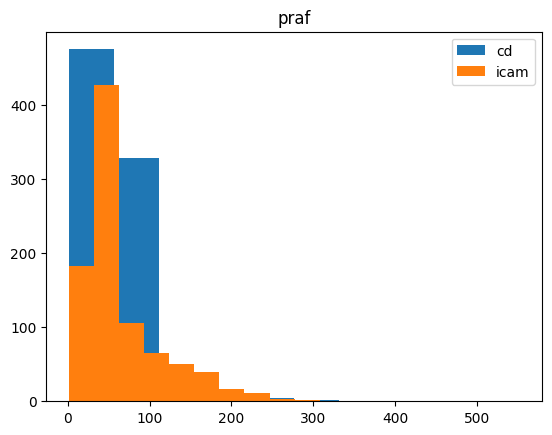

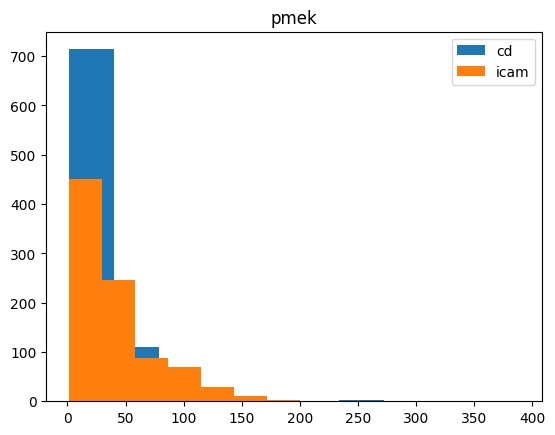

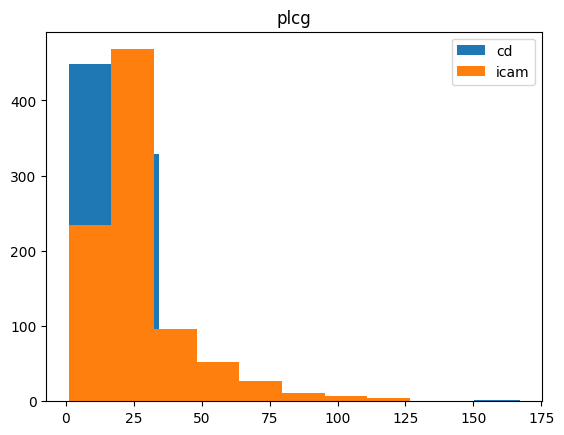

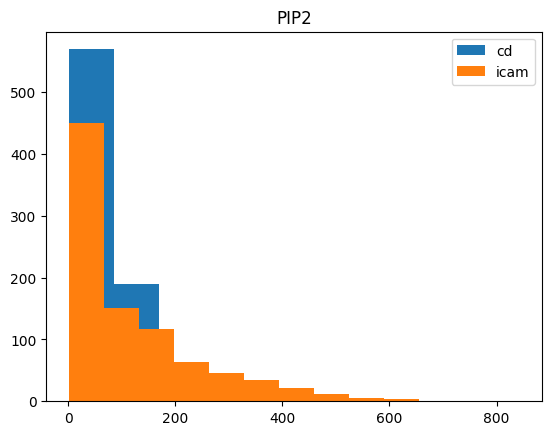

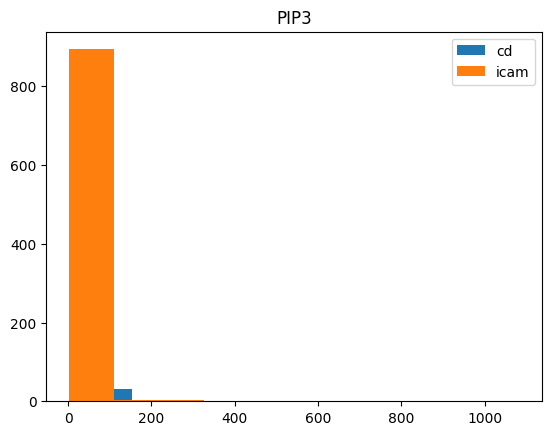

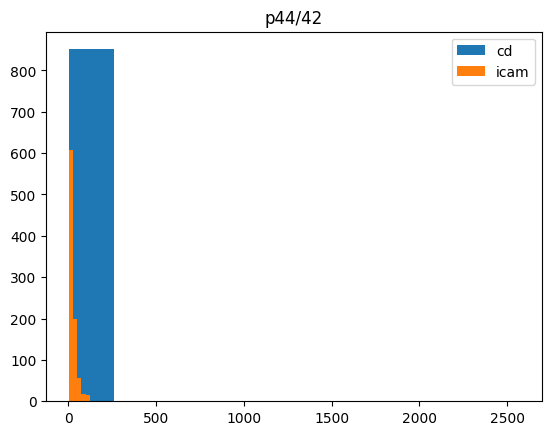

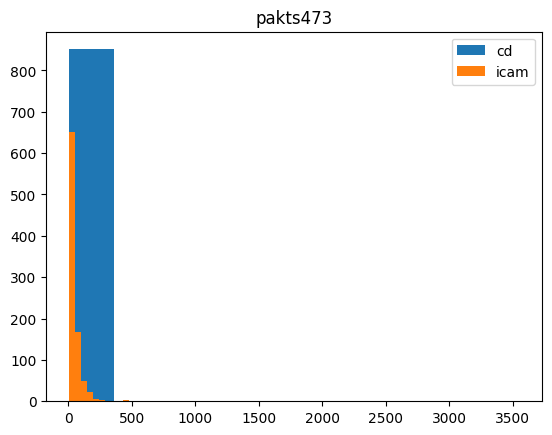

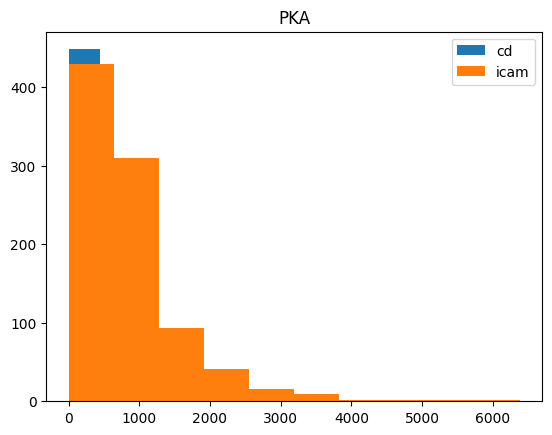

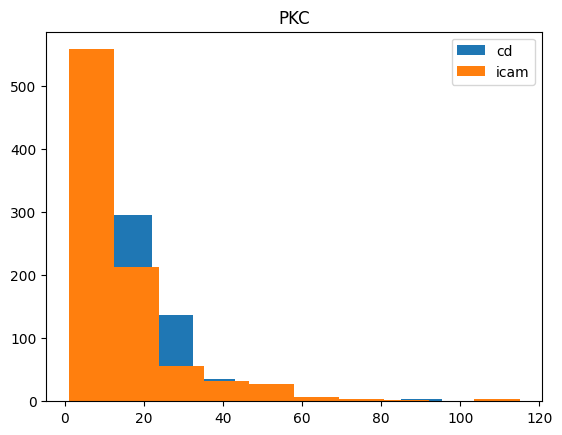

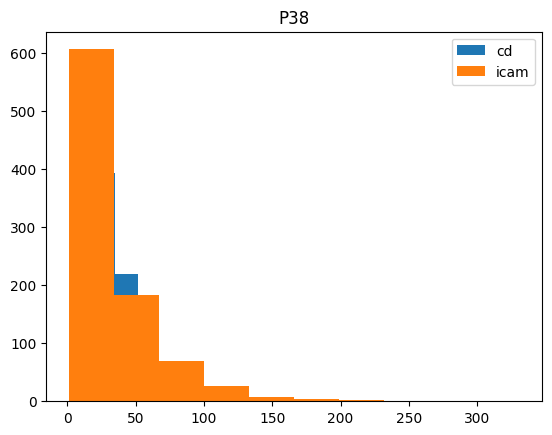

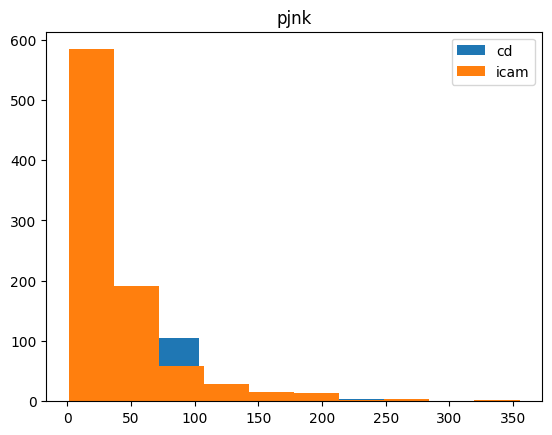

In [12]:
# Read observational datasets
obs_cd = pd.read_excel("cd3cd28.xls")
obs_cdicam =  pd.read_excel("cd3cd28icam2.xls")
for gene in obs_cd.columns:
    plt.hist(obs_cd[gene], label='cd')
    plt.hist(obs_cdicam[gene], label='icam')
    plt.title(gene)
    plt.legend()
    plt.show()

Index(['praf', 'pmek', 'plcg', 'PIP2', 'PIP3', 'p44/42', 'pakts473', 'PKA',
       'PKC', 'P38', 'pjnk'],
      dtype='object')


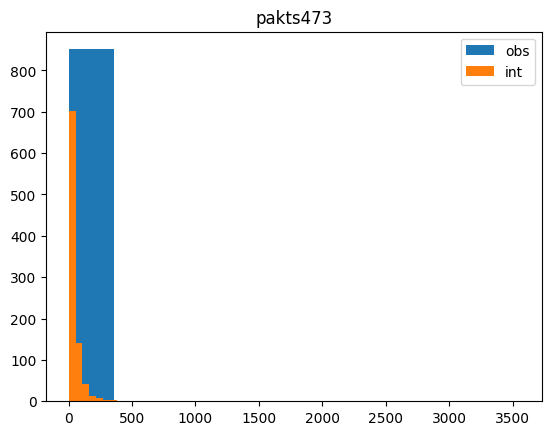

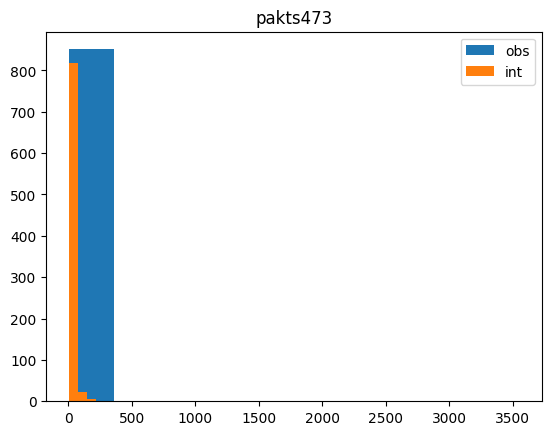

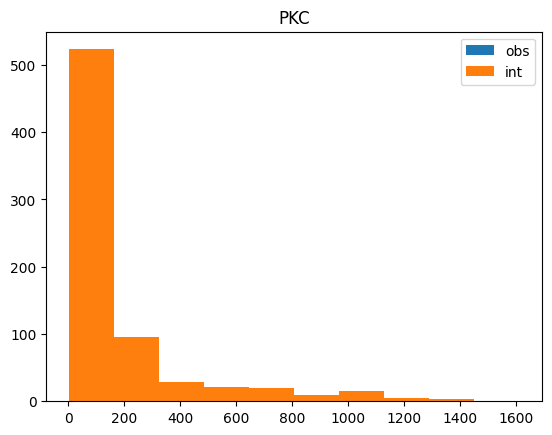

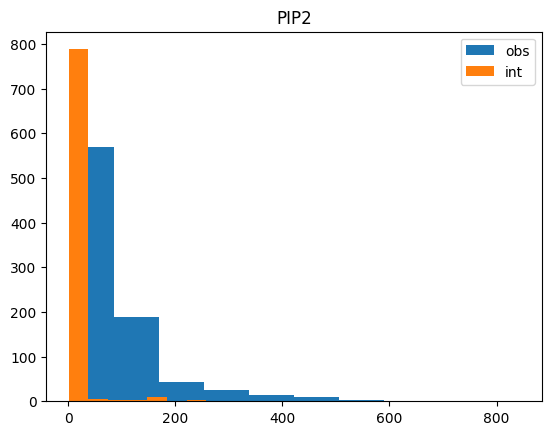

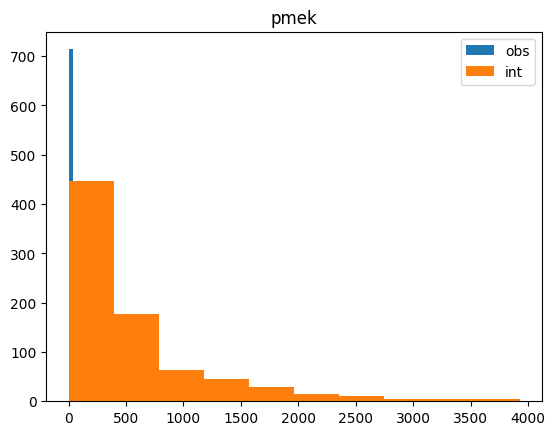

In [15]:
# Read interventional datasets
print(obs_cd.columns)
int_cd_akt_1 = pd.read_excel("cd3cd28+aktinhib.xls")
int_cd_pkc = pd.read_excel("cd3cd28+g0076.xls")
int_cd_akt_2 = pd.read_excel("cd3cd28+ly.xls")
int_cd_pip2 = pd.read_excel("cd3cd28+psitect.xls")
int_cd_mek = pd.read_excel("cd3cd28+u0126.xls")
int_cd = {"pakts473":[int_cd_akt_1, int_cd_akt_2], "PKC":[int_cd_pkc], "PIP2": [int_cd_pip2], "pmek":[int_cd_mek]}
for gene, datasets in int_cd.items():
    for int in datasets: 
        plt.hist(obs_cd[gene], label="obs")
        plt.hist(int[gene], label="int")
        plt.title(gene)
        plt.legend()
        plt.show()


Index(['praf', 'pmek', 'plcg', 'PIP2', 'PIP3', 'p44/42', 'pakts473', 'PKA',
       'PKC', 'P38', 'pjnk'],
      dtype='object')


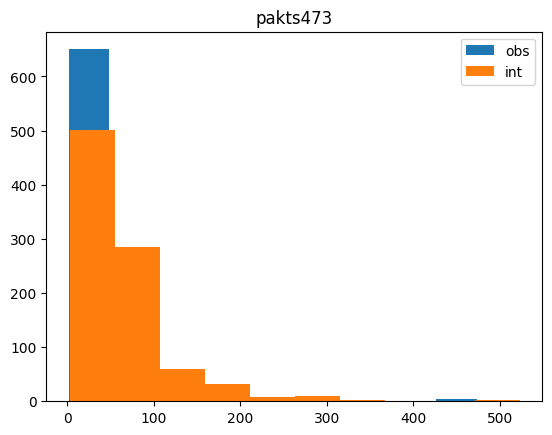

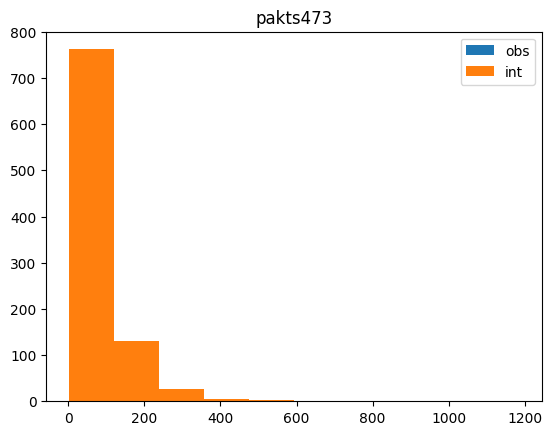

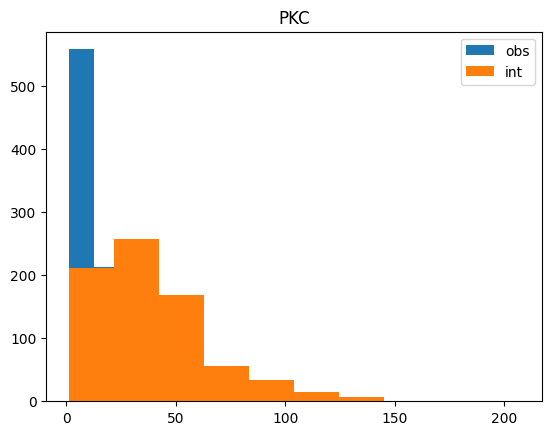

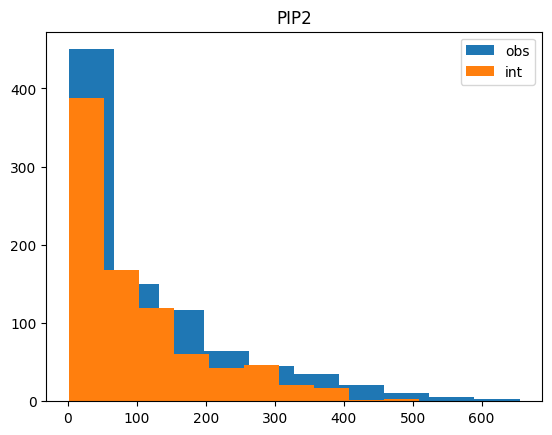

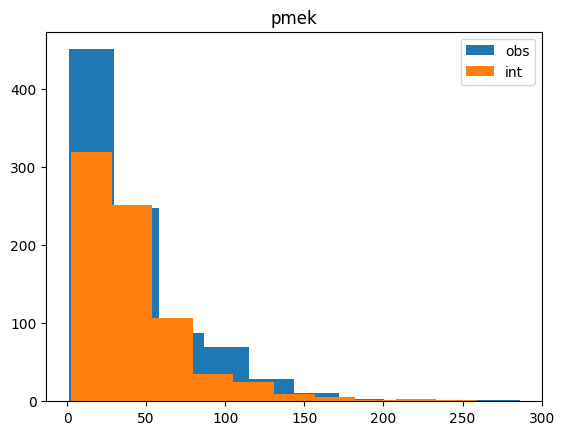

In [26]:
# Read interventional datasets
print(obs_cdicam.columns)
int_cd_akt_1 = pd.read_excel("cd3cd28icam2+aktinhib.xls")
int_cd_pkc = pd.read_excel("cd3cd28icam2+g0076.xls")
int_cd_akt_2 = pd.read_excel("cd3cd28icam2+ly.xls")
int_cd_pip2 = pd.read_excel("cd3cd28icam2+psit.xls")
int_cd_mek = pd.read_excel("cd3cd28icam2+u0126.xls")
int_cdicam = {"pakts473":[int_cd_akt_1, int_cd_akt_2], "PKC":[int_cd_pkc], "PIP2": [int_cd_pip2], "pmek":[int_cd_mek]}
for gene, datasets in int_cdicam.items():
    for int in datasets: 
        plt.hist(obs_cdicam[gene], label="obs")
        plt.hist(int[gene], label="int")
        plt.title(gene)
        plt.legend()
        plt.show()

Index(['praf', 'pmek', 'plcg', 'PIP2', 'PIP3', 'p44/42', 'pakts473', 'PKA',
       'PKC', 'P38', 'pjnk'],
      dtype='object')
Index(['praf', 'pmek', 'plcg', 'PIP2', 'PIP3', 'p44/42', 'pakts473', 'PKA',
       'PKC', 'P38', 'pjnk'],
      dtype='object')


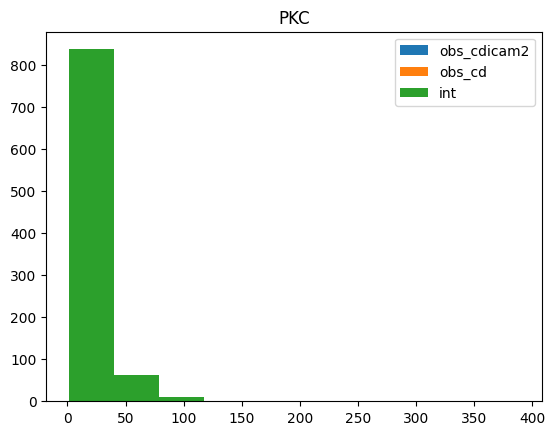

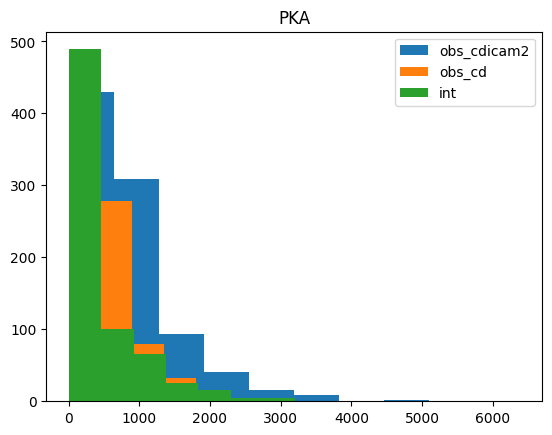

In [33]:
int_pkc = pd.read_excel("pma.xls")
int_pka = pd.read_excel("b2camp.xls")
int_pkc = int_pkc.rename(columns={"pip2":"PIP2", "pip3":"PIP3"})
print(int_pkc.columns)
print(int_pka.columns)
int = {"PKC":[int_pkc], "PKA":[int_pka]}
for gene, datasets in int.items():
    for int in datasets: 
        plt.hist(obs_cdicam[gene], label="obs_cdicam2")
        plt.hist(obs_cd[gene], label="obs_cd")
        plt.hist(int[gene], label="int")
        plt.title(gene)
        plt.legend()
        plt.show()

In [34]:
# Create data set for causal discovery
dataset = pd.concat([obs_cd, obs_cdicam])
dataset['target'] = np.zeros(dataset.shape[0])

interventions = {"pmek":2, "PIP2":4, "pakts473":7, "PKA":8, "PKC":9}
for gene, ind in interventions.items():
    if gene == "PKC":
        int_data = pd.concat(int_cd[gene] + int_cdicam[gene] +[int_pkc])
    elif gene == "PKA":
        int_data = int_pka
    else:
        int_data = pd.concat(int_cd[gene] + int_cdicam[gene])
    int_data['target'] = ind*np.ones(int_data.shape[0])
    dataset = pd.concat([dataset, int_data])
print(dataset.head)

<bound method NDFrame.head of      praf   pmek   plcg    PIP2   PIP3  p44/42  pakts473     PKA    PKC   P38  \
0    26.4  13.20   8.82   18.30  58.80    6.61      17.0   414.0  17.00  44.9   
1    35.9  16.50  12.30   16.80   8.13   18.60      32.5   352.0   3.37  16.5   
2    59.4  44.10  14.60   10.20  13.00   14.90      32.5   403.0  11.40  31.9   
3    73.0  82.80  23.10   13.50   1.29    5.83      11.8   528.0  13.70  28.6   
4    33.7  19.80   5.19    9.73  24.80   21.10      46.1   305.0   4.66  25.7   
..    ...    ...    ...     ...    ...     ...       ...     ...    ...   ...   
908  14.9   9.56  21.30   29.70  16.10   67.30     113.0  1241.0  33.70  58.8   
909  24.8  34.00  13.30   18.40   6.92   27.10      46.1   858.0  10.70  34.3   
910  14.2  13.20  11.90  100.00   5.19   37.90      57.8   757.0  11.80  19.1   
911  62.1  47.00  15.40   22.70   5.78   36.20      49.6   461.0  12.20  19.6   
912  10.5   6.98  23.50   35.50   5.23   32.20      53.8   851.0  14.10  20.2  

In [35]:
dataset.to_csv("sachs_raw.csv", index=False)